#CHAPTER 1. Basic Definition

## 1. Definition of Mixture Models

- Mixture model: probability distributions that can account for a variety of features in the data including multi-modality and skewness. 

- The idea of mixture models: to take multiple probability distributions and put them together in some sense using a linear combination.

- In a Mixture Model, All components don't have to belonging to the same family of distributions.

<br>

$$ F(x) = \sum_{k=1}^{K} w_k G_k (x) $$
$$ f(x) = \sum_{k=1}^{K} w_k g_k (x) $$
$$ , \sum_{k=1}^{K} w_k = 1$$

$$ \Leftrightarrow $$

$$ F(x) = \sum_{k=1}^{K} w_k G (x| \theta_k) $$
$$ f(x) = \sum_{k=1}^{K} w_k g (x| \theta_k) $$
$$ , \sum_{k=1}^{K} w_k = 1$$

<br>

- where, $w_k$ is called weight and $k$ is called component. Also, $\theta_k$ is paramters of each distributions.

- Example: Mixture of Normals

    1) Location Mixture of Normals
$$f(x) = \sum_{k=1}^{K} w_k {1 \over \sqrt{2 \pi} \sigma} exp \{ - {1 \over 2 \sigma^2} (x- \mu_k)^2 \}$$
    2) Location-Scale Mixture of Normals
$$f(x) = \sum_{k=1}^{K} w_k {1 \over \sqrt{2 \pi} \sigma_k} exp \{ - {1 \over 2 \sigma_k^2} (x- \mu_k)^2 \}$$


- Expectation of $X$

$$E_X (X) = \int_{-\infty}^{\infty} x f(x) dx 
\\ = \int_{-\infty}^{\infty} x \sum_{k=1}^{K} w_k g_k (x) dx \\ = \sum_{k=1}^{K} w_k \int_{-\infty}^{\infty} x g_k (x) dx \\ = \sum_{k=1}^{K} w_k E_k (X)$$ 

- Moment Generate Function of $X$

$$ M_X (t) = E_X (e^{tX}) = \int_{-\infty}^{\infty} e^{xt} f(x) dx \\= 
\int_{-\infty}^{\infty} e^{xt} \sum_{k=1}^{K} w_k g_k (x) dx \\=
\sum_{k=1}^{K} w_k \int_{-\infty}^{\infty} e^{xt} g_k (x) dx \\=
\sum_{k=1}^{K} w_k M_{X|k} (t)$$ 

- Variance of $X$

$$E_X (X^2) = \int_{-\infty}^{\infty} x^2 f(x) dx \\=
\int_{-\infty}^{\infty} x^2 \sum_{k=1}^{K} w_k g_k (x) dx \\=
\sum_{k=1}^{K} w_k \int_{-\infty}^{\infty} x^2 g_k (x) dx \\
= \sum_{k=1}^{K} w_k E_k (X^2)\\
= \sum_{k=1}^{K} w_k [Var_k (X) + (E_k (X))^2] $$ 

$$\Rightarrow Var_X(X) = E_X(X^2) - E_X (X)^2$$

- Double Expectation Theorem

    : Moments of X can easily be obtained using the latent variable $C$ by Double Expectation Theorem

$$E_X (X) = E_C[E_X(X|C)]$$

$$Var_X (X) = Var_C[E_X(X|C)] + E_C[Var_X (X|C)]$$

- If $|\mu_1 - \mu_2|/\sigma \leq 2$ then the mixture is unimodal for all $\pi$
- If $|\mu_1 - \mu_2|/\sigma \gt 2$ then the modality of the mixture depends on $\pi$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson

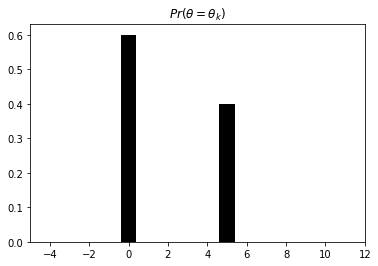

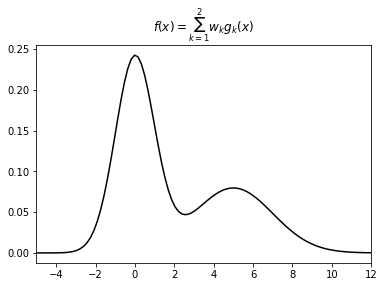

In [ ]:
# Mixture of Univariate Normals, Bimodal

sigma = [1, 2]
mu = [0, 5]
w = [0.6 , 0.4]

x = np.linspace(-5, 12, 100)
y = w[0]*norm(mu[0],sigma[0]).pdf(x) + w[1]*norm(mu[1],sigma[1]).pdf(x)

plt.bar(mu, w,  color = "black")
plt.title(r"$Pr(\theta = \theta_k)$")
plt.xlim(-5, 12)
plt.show()

plt.title(r"$f(x) = \sum_{k=1}^{2} w_k g_k(x)$")
plt.plot(x, y, c="black")
plt.xlim(-5,12)
plt.show()


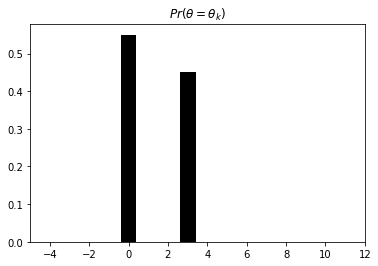

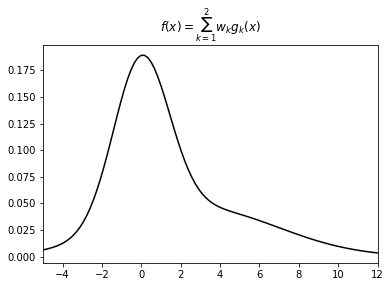

In [ ]:
# Mixture of Univariate Normals, unimodal skewed

sigma = [np.sqrt(2), 4]
mu = [0, 3]
w = [0.55 , 0.45]

x = np.linspace(-5, 12, 100)
y = w[0]*norm(mu[0],sigma[0]).pdf(x) + w[1]*norm(mu[1],sigma[1]).pdf(x)

plt.bar(mu, w,  color = "black")
plt.title(r"$Pr(\theta = \theta_k)$")
plt.xlim(-5, 12)
plt.show()

plt.title(r"$f(x) = \sum_{k=1}^{2} w_k g_k(x)$")
plt.plot(x, y, c="black")
plt.xlim(-5,12)
plt.show()

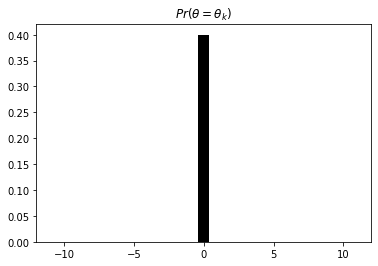

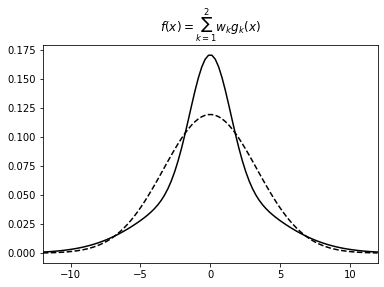

In [ ]:
# Mixture of Univariate Normals, unimodal heavy tail

sigma = [np.sqrt(2), np.sqrt(16), np.sqrt(20)]
mu = [0, 0, 0]
w = [0.4 , 0.4, 0.2]

x = np.linspace(-12, 12, 100)
y = w[0]*norm(mu[0],sigma[0]).pdf(x) + w[1]*norm(mu[1],sigma[1]).pdf(x) + w[2]*norm(mu[2],sigma[2]).pdf(x)

s = np.sqrt(0.4*2 + 0.4*16 + 0.2*20)
z = norm(mu[0], s).pdf(x)

plt.bar(mu, w,  color = "black")
plt.title(r"$Pr(\theta = \theta_k)$")
plt.xlim(-12, 12)
plt.show()

plt.title(r"$f(x) = \sum_{k=1}^{2} w_k g_k(x)$")
plt.plot(x, y, c="black")
plt.plot(x, z, c="black", linestyle = "--")
plt.xlim(-12,12)
plt.show()

## 2. Likelihood Function for Mixture Models

### 2.1 Hierarchical Representation

- Hierarchical Representation provides a very nice interpretation for mixture models, and will be very useful in terms of computation because most algorithms that are used for estimating the parameters in a mixture model are going to rely on some version of this categorical representation

- We define that Indicator $C \in \{ 1,2,...,K \}$ is Discrete Random Variable. 

<br>

$$X|C \sim g_c (x) \tag{2.1}$$
$$C \sim p(c)  \tag{2.2}$$

<br>

- where, $p(c) = Pr(C=c) = w_c$
- So, we can obtain that 
<br>
$$f(x) = \sum_{c=1}^{K} g(x|c) p(c) = \sum_{c=1}^{K} g_c(x) w_c $$
<br>

- If we know how to generate random variables from the $g_c$, hierarchical representation provide us a simple way to generate random variables from mixture.

- For each observation $i$, 

    1) Randomly sample $c_i$ with probability given by $w_1, ..., w_k$    
        
    2) Given the value of $c_i$ that we just sampled 
    $$X_i \sim g_{c_i}$$


- It means that we sample X_i from the $c_i$ component of the mixture



### 2.2 Graphical Representation

- Graphical Representation illustrate the Hierarchical Representation as a picture.

- In the below figure, grey circle is observed variable and white circle is latent variable.

- Latent variable $C$ only depends on the parameter $\tilde{w} = \{w_1, ..., w_K \}$

- Observed variable $X$ depends on the parameter $\tilde{\theta} = \{\theta_1, ..., \theta_K \}$ and Latent variable $C$

- Observation number is $N$





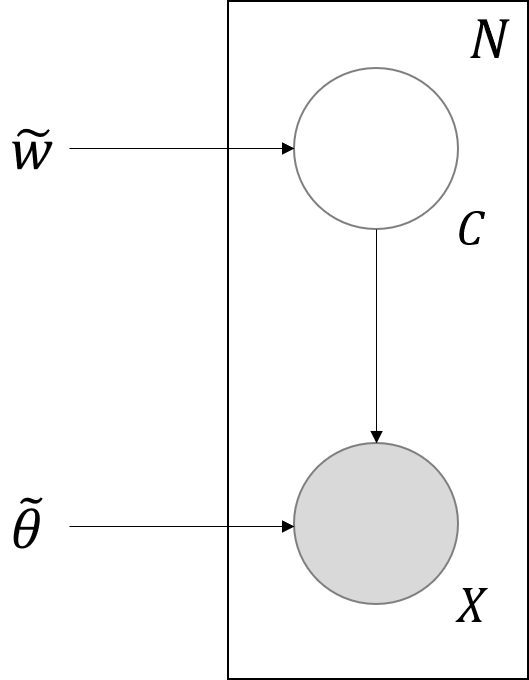

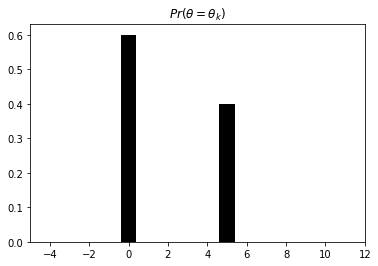

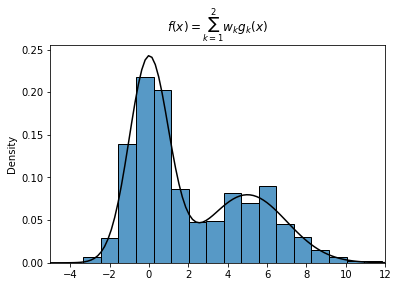

Sample Mean:  2.065115686300371
Sample Variance:  8.543630043479657
True Mean:  2.0
True Variance:  8.200000000000001


In [ ]:
# Mixture of Univariate Normals

## Sampling Random samples by a hierarchical representation

n = 1000
sigma = np.array([1, 2])
mu = np.array([0, 5])
w = [0.6 , 0.4]

k_component = 2
x = []
cc = []
for i in range(n):
    c = np.random.choice(k_component, 1, p = w)    
    x.extend(np.random.normal(mu[c], sigma[c], 1))
    cc.extend(c)

x = np.array(x)
cc = np.array(cc)

xx = np.linspace(-5, 12, 100)
yy = w[0]*norm(mu[0],sigma[0]).pdf(xx) + w[1]*norm(mu[1],sigma[1]).pdf(xx)

plt.bar(mu, w,  color = "black")
plt.title(r"$Pr(\theta = \theta_k)$")
plt.xlim(-5, 12)
plt.show()

sns.histplot(x, stat = "density")

plt.title(r"$f(x) = \sum_{k=1}^{2} w_k g_k(x)$")
plt.plot(xx, yy, c="black")
plt.xlim(-5,12)
plt.show()

## Calculate Moments

class Moments():
    def __init__(self, mu, sigma, w):
        self.mu = mu
        self.sigma = sigma
        self.w = w
    def mean(self):
        k = len(self.mu)
        m = 0
        for i in range(k):
            m += self.mu[i]*self.w[i]
        self.m = m
        return self.m
    def variance(self):
        k = len(self.sigma)
        v = 0
        for i in range(k):
            v += self.w[i] * (self.mu[i]**2 + self.sigma[i]**2)
        self.v = v - self.m**2
        return self.v

print("Sample Mean: ",np.mean(x))
print("Sample Variance: ", np.var(x))

Cal = Moments(mu, sigma, w)
print("True Mean: ", Cal.mean() )
print("True Variance: ", Cal.variance() )

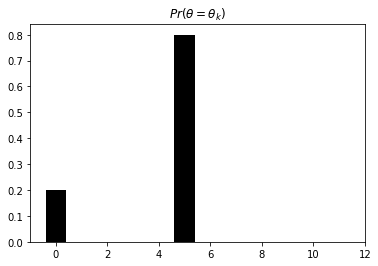

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


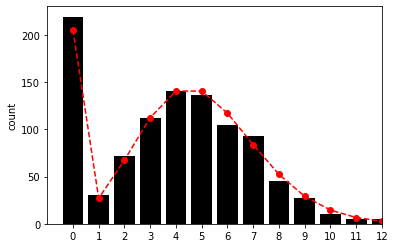

Sample Mean:  3.87
Sample Variance:  8.0471
True Mean:  4.0
True Variance:  8.0


In [ ]:
# Zero Inflated poisson distribution

## Sampling Random samples by a hierarchical representation

n = 1000
lamb = 5
w = [0.2 , 0.8]

k_component = 2
x = []
cc = []
for i in range(n):
    c = np.random.choice(k_component, 1, p = w)    
    if c == 0:
        x.extend([0])
        cc.extend(c)
    else:        
        x.extend(np.random.poisson(lamb, 1))
        cc.extend(c)

x = np.array(x)
cc = np.array(cc)

xx = np.linspace(0, 12, 13)
yy = w[1]*poisson(lamb).pmf(xx) + w[0] * np.append(1, np.repeat(0, len(xx) - 1))  

plt.bar([0, lamb], w,  color = "black")
plt.title(r"$Pr(\theta = \theta_k)$")
plt.xlim(-1, 12)
plt.show()

sns.countplot(x, facecolor = "black", )
plt.plot(xx, yy*n, linestyle = "--",marker = "o", c = "red")
plt.xlim(-1, 12)
plt.show()

## Calculate Moments

print("Sample Mean: ",np.mean(x))
print("Sample Variance: ", np.var(x))

mu = [0, lamb]
sigma = [0, np.sqrt(lamb)]

Cal = Moments(mu, sigma, w)
print("True Mean: ", Cal.mean() )
print("True Variance: ", Cal.variance() )

### 2.3 The likelihood function

- Observed Data Likelihood
    
    : Our assumption is typically going to be that we only have observations $X_1$ up to $X_n$. 

$$X_1 , \cdots , X_n \overset{i.i.d}\sim f$$
$$f(x) = \sum_{k=1}^K w_k g_k (x | \theta_k )$$
$$L(\tilde{w}, \tilde{\theta} | \tilde{x}) = \prod_{i=1}^{n} \sum_{k=1}^K w_k g_k (x_i |\theta_k )$$

$$\tilde{x} = (x_1 ,..., x_n )$$

- Complete Data Likelihood
    
    : The idea now is that we are going to augment our **_parameter space_** by also considering the **_latent observation C_** that we discussed before another Hirarchical representation, that just tell us to which component each observation belongs. and we are going to have one $C$ for each observation that we have

$$ X_i | C_i \sim g_{c_i} (x_i )  $$
$$C_i \overset{i.i.d}\sim p(c) $$
$$ p(c) = w_c  $$

$$f(x_i)= \prod_{i=1}^{n} \sum_{k=1}^K w_k g_k (x_i |\theta_k )$$


$$L(\tilde{w}, \tilde{\theta} | \tilde{c}, \tilde{x})= \prod_{i=1}^{n} f(x_i, c_i) \\ =  \prod_{i=1}^{n} f(x_i | c_i) f(c_i) \\ = \prod_{i=1}^n \sum_{k=1}^{K} f(x_i | C_i=k) p(C_i=k) $$

- Since $i$th observation have only one value of $C_i$,

$$ \sum_{k=1}^{K} f(x_i | C_i=k) p(C_i=k) = \prod_{k=1}^{K} [w_k g_k (x_i)]^{I(C_i = k)} $$

- Thus, we can obtain that

$$ L(\tilde{w}, \tilde{\theta}, \tilde{C})=  \prod_{i=1}^{n} \prod_{k=1}^{K} [w_k g_k (x_i)]^{I(C_i = k)} $$



In [ ]:
## Understanding the Likelihood function using Simulation Dataset 

class gmm_loglikelihood():
    def __init__(self, mu, sigma, w):
        self.mu = mu
        self.sigma = sigma
        self.w = w

    def observed(self, xx):
        pdf = self.w[0]*norm(self.mu[0],self.sigma[0]).pdf(xx)
        K = len(w)
        for k in range(K):
            pdf +=  self.w[k]*norm(self.mu[k],self.sigma[k]).pdf(xx)
        self.res = np.sum(np.log(pdf))
        return self.res

    def complete(self, xx, cc):
        pdf = (self.w[0]*norm(self.mu[0],self.sigma[0]).pdf(xx))**(cc==0)
        K = len(w)
        for k in range(K):
            pdf *=  (self.w[k]*norm(self.mu[k],self.sigma[k]).pdf(xx))**(cc==k)
        self.res = np.sum(np.log(pdf))
        return self.res


In [ ]:
n = 1000
sigma = np.array([1, 2])
mu = np.array([0, 5])
w = [0.8 , 0.2]

k_component = 2
x = []
cc = []
for i in range(n):
    c = np.random.choice(k_component, 1, p = w)    
    x.extend(np.random.normal(mu[c], sigma[c], 1))
    cc.extend(c)

x = np.array(x)
cc = np.array(cc)

gmm = gmm_loglikelihood(mu, sigma, w)
print("Observed Likelihood: ", gmm.observed(x))
print("Complete Likelihood: ", gmm.complete(x, cc))

Observed Likelihood:  -1503.480716008049
Complete Likelihood:  -3462.1748497211597


### Identifiability in mixture models 

- The numbers of components in a mixture model isn't an identifiable paramter.
- The labels of the mixture components aren't identifiable parameters.

